### Exploratory Data Analysis
In this jupyter notebook, we will practice data processing using a real-world dataset of house sale records. The notebook is divided into six parts. For each part, we provide example analysis to guide you. **Your task** is to conduct your own analysis by following the logic shown in the examples.

There are a total of 4 tasks: 3 required and 1 optional. **Note**: when completing the tasks, please provide **not only** the code, but also include necessary comments and discussions, as demonstrated in the examples.

- **Part-1: Data overview**
    > check the #samples, #attributes <br>
    > attribute types <br>
    
- **Part-2: Data cleaning**
    > missing value and outlier detection <br>
    > organize attributes into appripriate data types (e.g., numerical, categorical, datatime, text, image, ...) <br>
    
    
- **Part-3: Categorical data processing**
> missing value / outlier identification and processing <br>
> one-hot/ordinal encoding <br>

- **Part-4: Numerical data processing**
> missing value / outlier identification and processing <br>
> scale data: normalization/standardization <br>

- **Part-5: Text data processing**
> missing value identification and processing <br>
> tokenization <br>
> vectorization <br>
> frequent feature analysis <br>
> non-sense feature analysis <br>


- **Part-6: Additional exploration**
    > DataTime processing <br>
    > creating new features from existing features <br>
    > feature colinearty check <br>
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data overview

In [1]:
# read data from file to a pandas dataframe
import pandas as pd
data_df = pd.read_feather('D:/house_sales.ftr')

In [3]:
# check the shape of the data frame: row: #samples (short for number of samples), column: #attributes (short for number of attributes)
data_df.shape

(164944, 1789)

In [4]:
# get an overview of the top-n rows/samples
data_df.head()

,Id,Address,Sold Price,Sold On,Summary,Type,Year built,Heating,Cooling,Parking,...,Well Disclosure,remodeled,DOH2,SerialX,Full Baths,Tax Legal Lot Number,Tax Legal Block Number,Tax Legal Tract Number,Building Name,Zip
0,2080183300,"11205 Monterey,","$2,000,000",01/31/20,"11205 Monterey, San Martin, CA 95046 is a sing...",SingleFamily,No Data,No Data,No Data,0 spaces,...,None,None,None,None,None,None,None,None,None,95046
1,20926300,"5281 Castle Rd,","$2,100,000",02/25/21,Spectacular Mountain and incredible L.A. City ...,SingleFamily,1951,Central,"Central Air, Dual","Driveway, Driveway - Brick",...,None,None,None,None,None,None,None,None,None,91011
2,19595300,"3581 Butcher Dr,","$1,125,000",11/06/19,Eichler Style home! with Santa Clara High! in ...,SingleFamily,1954,Central Forced Air - Gas,Central AC,"Garage, Garage - Attached, Covered",...,None,None,None,None,None,None,None,None,None,95051
3,300472200,"2021 N Milpitas Blvd,","$36,250,000",10/02/20,"2021 N Milpitas Blvd, Milpitas, CA 95035 is a ...",Apartment,1989,Other,No Data,"Mixed, Covered",...,None,None,None,None,None,None,None,None,None,95035
4,2074492000,"LOT 4 Tool Box Spring Rd,","$140,000",10/19/20,Beautiful level lot dotted with pine trees ro...,VacantLand,No Data,No Data,No Data,0 spaces,...,None,None,None,None,None,None,None,None,None,92561


### Data cleaning

#### check missing values

In [2]:
null_sum = data_df.isnull().sum()
null_sum

Id                             0
Address                        0
Sold Price                    85
Sold On                        0
Summary                     3117
                           ...  
Tax Legal Lot Number      164943
Tax Legal Block Number    164943
Tax Legal Tract Number    164943
Building Name             164943
Zip                            0
Length: 1789, dtype: int64

In [3]:
# Drop columns that have at least 30% missing values
data_df.drop(columns=data_df.columns[null_sum > len(data_df) * 0.3], inplace=True)

In [3]:
# check the remaining columns
data_df.shape, data_df.columns

((164944, 1789),
 Index(['Id', 'Address', 'Sold Price', 'Sold On', 'Summary', 'Type',
        'Year built', 'Heating', 'Cooling', 'Parking',
        ...
        'Well Disclosure', 'remodeled', 'DOH2', 'SerialX', 'Full Baths',
        'Tax Legal Lot Number', 'Tax Legal Block Number',
        'Tax Legal Tract Number', 'Building Name', 'Zip'],
       dtype='object', length=1789))

In [7]:
# check the data types: columns with mixed types are stored as "object"
data_df.dtypes

Id                             object
Address                        object
Sold Price                     object
Sold On                        object
Summary                        object
Type                           object
Year built                     object
Heating                        object
Cooling                        object
Parking                        object
Bedrooms                       object
Bathrooms                      object
Total interior livable area    object
Total spaces                   object
Garage spaces                  object
Home type                      object
Region                         object
Elementary School              object
Elementary School Score        object
Elementary School Distance     object
High School                    object
High School Score              object
High School Distance           object
Heating features               object
Parking features               object
Lot size                       object
Parcel numbe

#### organize columns into different data types
The $.dtype$ attribute shows that the current data type for each column is $"object"$, this is either because the column contains missing values or because it contains values of different types.   

We will organize the columns into the following data types (based on the values):
- Categorical:
    > Id, Type, Home type, Region, Elementary School, High School, Parcel number, Zip <br>
- Numerical:
    > Sold Price, Bedrooms, Bathrooms, Total interior livable area, Total spaces, Garage spaces, Elementary School Score, Elementary School Distance, High School Score, High School Distance, Lot size, Tax assessed value, Annual tax amount, Listed Price <br>
- DateTime:
    > Sold On, Year built, Listed On <br>
- Text/String:
    > Address, Summary, Heating, Cooling, Parking, Heating features, Parking features <br>

In the following part, we will:
- convert the original data into the organized data type
- process data of different types

### Categorical data processing

In [4]:
# Convert the following columns to categorical data types
cat_col = ['Id', 'Type', 'Home type', 'Region', 'Elementary School', 'High School', 'Parcel number', 'Zip']
data_df[cat_col] = data_df[cat_col].astype('category')
data_df[cat_col]

,Id,Type,Home type,Region,Elementary School,High School,Parcel number,Zip
0,2080183300,SingleFamily,SingleFamily,San Martin,Rucker Elementary School,Christopher High School,NaN,95046
1,20926300,SingleFamily,SingleFamily,La Canada Flintridge,Mountain Avenue Elementary School,Crescenta Valley High School,5870016003,91011
2,19595300,SingleFamily,SingleFamily,Santa Clara,Pomeroy Elementary School,Santa Clara High School,29022100,95051
3,300472200,Apartment,Apartment,Milpitas,Joseph Weller Elementary School,Milpitas High School,02201015,95035
4,2074492000,VacantLand,NaN,Mountain Center,Mcsweeny Elementary School,West Valley High School,NaN,92561
...,...,...,...,...,...,...,...,...
164939,72555199,Condo,Condo,Richmond,Washington Elementary School,Kennedy High School,5607700878,94804
164940,94643599,Condo,Condo,Los Angeles,Charles H. Kim Elementary School,NaN,5503030207,90010
164941,300479799,Condo,Condo,Mountain View,Edith Landels Elementary School,Mountain View High School,16088037,94043
164942,15504399,SingleFamily,SingleFamily,Pacifica,Cabrillo Elementary School,Jefferson High School,022402090,94044


In [3]:
# the following columns now all have the categorical data types
data_df[cat_col].dtypes

Id                   category
Type                 category
Home type            category
Region               category
Elementary School    category
High School          category
Parcel number        category
Zip                  category
dtype: object

**Outlier detection for each categorical feature**
- Here we take the "Type" column as an example to show the logics

In [4]:
# count the #samples fall into each category
data_df['Type'].value_counts()

SingleFamily                        102040
Condo                                27443
MultiFamily                           7346
Townhouse                             7108
VacantLand                            6199
                                     ...  
Low-Rise (1-3), Full, Unit Above         1
Low-Rise (1-3), Ground Floor             1
Low-Rise (1-3), Live/Work                1
Low-Rise (1-3), Semi-Attached            1
Hi-Rise (9+), Studio                     1
Name: Type, Length: 317, dtype: int64

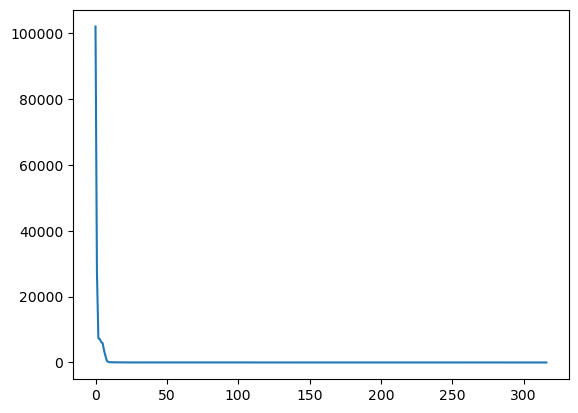

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# an alternative method to visualize #samples in each category
plt.plot(data_df['Type'].value_counts().values)

In [6]:
# a closer look at the #samples in each category
data_df['Type'].value_counts().values

array([102040,  27443,   7346,   7108,   6199,   5849,   3605,   1922,
          463,    176,     76,     56,     51,     48,     42,     27,
           21,     19,     19,     19,     18,     15,     14,     14,
           13,     13,     13,     12,     12,     12,     11,     11,
           10,     10,     10,      9,      9,      8,      8,      7,
            7,      7,      7,      7,      7,      6,      6,      6,
            6,      6,      6,      6,      6,      5,      5,      5,
            5,      5,      5,      5,      5,      5,      5,      4,
            4,      4,      4,      4,      4,      4,      4,      4,
            4,      4,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      2,      2,      2,
            2,      2,      2,      2,      2,      2,      2,      2,
            2,      2,      2,      2,      2,      2,      2,      2,
      

According to the above observation, we take categories that only have a small #samples as outlier/minority categories. To **deal with outliers**:
- we can directly **remove** the outlier categories
- or we can **merge** the minority categories with majority ones (example shown below)

In [5]:
# remove samples whose "Type" belongs to the minority categories
# our criteria here is to remove categories that have less than 10 samples
value_cts = data_df['Type'].value_counts()
cat_to_remove = value_cts[value_cts < 10].keys()
cat_to_remove

CategoricalIndex(['RURLRES', 'Full',
                  'Luxury, New Construction, Mid-Rise (4-8)',
                  'SINGLE, RURLRES', '4+ Story', 'Apartments', '2 Story, Full',
                  'Junior', '1 Story', 'Luxury, 2 Level',
                  ...
                  '1 Level, Top Floor, Unit Below, Flat', 'Leased Land',
                  '1 Level, Top Floor, Unit Below',
                  '1 Level, Top Floor, Low-Rise (1-3), Full, Attached',
                  'Low-Rise (1-3), End Unit',
                  'Low-Rise (1-3), Full, Unit Above',
                  'Low-Rise (1-3), Ground Floor', 'Low-Rise (1-3), Live/Work',
                  'Low-Rise (1-3), Semi-Attached', 'Hi-Rise (9+), Studio'],
                 categories=['1 Level', '1 Level, Attached', '1 Level, Flat', '1 Level, Flat, Low-Rise (1-3)', ..., 'Unit Below, Low-Rise (1-3), Unit Above', 'Unknown', 'Vacant Land', 'VacantLand'], ordered=False, dtype='category', length=282)

In [6]:
print("Data size before dropping minority categories:", data_df.shape)
data_df.drop(data_df[data_df['Type'].isin(cat_to_remove)].index, inplace=True)
print("Data size after dropping minority categories:", data_df.shape)

Data size before dropping minority categories: (164944, 32)
Data size after dropping minority categories: (164401, 32)


In [ ]:
# double check the remaining categories
data_df['Type'].astype('string').value_counts()

# question: check what happens if not using astype('string') in the above expression?

SingleFamily            102040
Condo                    27443
MultiFamily               7346
Townhouse                 7108
VacantLand                6199
Unknown                   5849
MobileManufactured        3605
Apartment                 1922
Single Family              463
Cooperative                176
Residential Lot             76
Single Family Lot           56
MFD-F                       51
Acreage                     48
2 Story                     42
3 Story                     27
Hi-Rise (9+), Luxury        21
Duplex                      19
RESIDENTIAL                 19
Condominium                 19
Mid-Rise (4-8)              18
31                          15
Vacant Land                 14
Hi-Rise (9+)                14
Detached                    13
Low-Rise (1-3)              13
Manufactured Home           13
3 Story, Duplex             12
Detached, 2 Story           12
Mobile Home                 12
Residential Sub Lot         11
Top Floor                   11
SINGLE  

In [ ]:
# merge minority categories with majority ones (e.g., SINGLE --> SingleFamily, Lots/Land-->VacantLand)
data_df['Type'].replace(['SINGLE', 'Lots/Land'],['SingleFamily', 'VacantLand'], inplace=True)

In [ ]:
# In the resulting categories, 'SINGLE' is merged with "SingleFamily" and 'Lots/Land' is merged with 'VacantLand'
data_df['Type'].value_counts()

SingleFamily            102050
Condo                    27443
MultiFamily               7346
Townhouse                 7108
VacantLand                6209
Unknown                   5849
MobileManufactured        3605
Apartment                 1922
Single Family              463
Cooperative                176
Residential Lot             76
Single Family Lot           56
MFD-F                       51
Acreage                     48
2 Story                     42
3 Story                     27
Hi-Rise (9+), Luxury        21
Duplex                      19
Condominium                 19
RESIDENTIAL                 19
Mid-Rise (4-8)              18
31                          15
Hi-Rise (9+)                14
Vacant Land                 14
Detached                    13
Manufactured Home           13
Low-Rise (1-3)              13
Mobile Home                 12
3 Story, Duplex             12
Detached, 2 Story           12
Residential Sub Lot         11
Top Floor                   11
ACREAGE 

#### Task-1: follow the logic of processing the "Type" column to process one of the following columns:
- Region
- Elementary School
- High School

*Notes:*
- You can decide whether to remove outliers or not and what specific threshold to use, based on your observation and common sense.
- You can also decide whether it makes sense to merge multiple categories.
- Please write down your thoughts as comments in the corresponding code cell.

In [7]:
# summarize the frequency of every single value
data_df['Region'].value_counts()

Los Angeles      32800
San Jose         18464
San Francisco    15272
Sunnyvale         2721
San Mateo         2540
                 ...  
Valley Home          1
Inskip               1
Innes                1
Hyland Park          1
Los Feliz            1
Name: Region, Length: 1433, dtype: int64

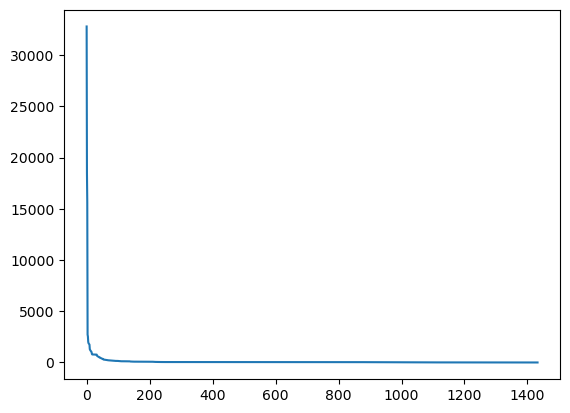

In [8]:
# draw a plot based on the frequency
plt.plot(data_df['Region'].value_counts().values)

From the plot, we can tell that the data in this category has a really long tail, which means that a large group of categories in 'Region' has very few frequencies. We will need to deal with the minorities.

In [26]:
data_df['Region'].value_counts().values

array([32800, 18467, 15656, ...,     0,     0,     0], dtype=int64)

In [8]:
# Set 15 as the threshold and find all the keys that have the frequencies lower than it
# Remove these minorities 
value_cts = data_df['Region'].value_counts()
cat_to_remove = value_cts[value_cts < 15].keys()
cat_to_remove

CategoricalIndex(['Strawberry Valley', 'Oak Hills', 'Palo Verde',
                  'Witter Springs', 'Lemon Cove', 'Lookout', 'Canyon Dam',
                  'Hoopa', 'Sea Ranch', 'Guatay',
                  ...
                  'Juniper Hills', 'Jose', 'Capilola', 'Jonesville',
                  'Johanasburg', 'Valley Home', 'Inskip', 'Innes',
                  'Hyland Park', 'Los Feliz'],
                 categories=['Acampo', 'Acton', 'Adelanto', 'Adin', ..., 'Yucaipa', 'Yucca Valley', 'Zamora', 'Zenia'], ordered=False, dtype='category', length=384)

In [9]:
print("Data size before dropping minority categories:", data_df.shape)

data_df.drop(data_df[data_df['Region'].isin(cat_to_remove)].index, inplace=True)

print("Data size after dropping minority categories:", data_df.shape)

Data size before dropping minority categories: (164401, 32)
Data size after dropping minority categories: (162761, 32)


In [ ]:
# double check
data_df['Region'].astype('string').value_counts()

Los Angeles      32800
San Jose         18467
San Francisco    15656
Sunnyvale         2721
San Mateo         2543
                 ...  
Hollywood           15
Blocksburg          15
Fulton              15
Topaz               15
Chualar             15
Name: Region, Length: 1049, dtype: Int64

The minorities are removed. But we can also put them in a new type 'Others'.
I think it will be a better way since it can help keep the completeness of the data and thus make the analysis after this more accurate.

In [ ]:
# Also we can merge the minorities into a new category named 'Others'.
# This block is ran after the kernel is restarted, jump the block of removing minorities
# and therefore the minorities are kept.

if data_df['Region'].dtype.name == 'category':
    if 'Others' not in data_df['Region'].cat.categories:
        data_df['Region'] = data_df['Region'].cat.add_categories(['Others'])

data_df['Region'] = data_df['Region'].replace(cat_to_remove, 'Others')
print(data_df['Region'].value_counts()['Others'])


1644


### Numerical data processing

In [9]:
num_col = ['Sold Price', 'Bathrooms', 'Total interior livable area', 'Total spaces', 'Garage spaces',
           'Elementary School Score', 'Elementary School Distance', 'High School Score', 'High School Distance',
           'Lot size', 'Tax assessed value', 'Annual tax amount', 'Listed Price']

Convert currency from string format (e.g., $1,000,000) to float.

In [ ]:
currency = ['Sold Price', 'Listed Price', 'Tax assessed value', 'Annual tax amount']
for c in currency:
    data_df[c] = data_df[c].replace(r'[$,-]', '', regex=True).replace(r'^\s*$', np.nan, regex=True).astype(float)

Convert areas from string format such as 1000 sqft and 1 Acres to float as well.

In [ ]:
areas = ['Total interior livable area', 'Lot size']
for c in areas:
    print(c)
    # attribute measured by Acres
    acres = data_df[c].str.contains('Acres') == True

    # e.g., 13,168 sqrt --> 13168
    col = data_df[c].replace(r'\b sqft\b|\b Acres\b|\b,\b','', regex=True).astype(float)

    # Acres --> sqft
    col[acres] *= 43560

    data_df[c] = col

Total interior livable area
Lot size


Now we can **convert the numerical columns to the "float" data type**

In [ ]:
data_df[num_col] = data_df[num_col].astype('float')
data_df[num_col]

,Sold Price,Bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,High School Score,High School Distance,Lot size,Tax assessed value,Annual tax amount,Listed Price
0,2000000.0,2.0,2000.0,0.0,0.0,6.0,0.7,6.0,1.4,NaN,NaN,NaN,NaN
1,2100000.0,3.0,2806.0,2.0,2.0,9.0,0.4,9.0,1.2,13168.0,1829308.0,22330.0,1950000.0
2,1125000.0,2.0,1517.0,2.0,2.0,4.0,0.6,6.0,0.8,4795.0,1125000.0,13472.0,1299888.0
3,36250000.0,0.0,98052.0,175.0,175.0,7.0,0.4,9.0,0.9,178596.0,14521205.0,175211.0,NaN
4,140000.0,NaN,NaN,NaN,NaN,3.0,23.8,5.0,25.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164939,563527.0,2.0,959.0,0.0,0.0,3.0,2.5,2.0,1.3,2178.0,486031.0,8243.0,548000.0
164940,2650000.0,3.0,2400.0,2.0,2.0,6.0,0.5,NaN,NaN,53578.8,2757060.0,33279.0,2750000.0
164941,1357000.0,NaN,1355.0,2.0,2.0,7.0,1.2,8.0,2.1,1651.0,1356661.0,16427.0,NaN
164942,1400000.0,3.0,2227.0,0.0,0.0,7.0,2.0,4.0,6.2,5401.0,272767.0,4165.0,1398000.0


In [ ]:
# the following columns now all have the numerical data types
data_df[num_col].dtypes

Sold Price                     float64
Bathrooms                      float64
Total interior livable area    float64
Total spaces                   float64
Garage spaces                  float64
Elementary School Score        float64
Elementary School Distance     float64
High School Score              float64
High School Distance           float64
Lot size                       float64
Tax assessed value             float64
Annual tax amount              float64
Listed Price                   float64
dtype: object

Before moving forward, we will first deal with columns that contain **missing values**

In [ ]:
# check the missing values of "Sold Price"
data_df['Sold Price'].isna().sum()

85

In [ ]:
# we will drop samples where the "Sold Price" is missing
data_df.drop(data_df[data_df['Sold Price'].isna()].index, inplace=True)

In [ ]:
# for the other numerical columns, we will fill in missing values with the mean of that column
for col in num_col:
    if col != "Sold Price":
        data_df[col].fillna(value = data_df[col].mean(), inplace=True)

In [ ]:
# descriptive statistics for the numerical columns
data_df[num_col].describe()
# If the describe() function is applied on non-numerical columns, the statistics won't make sense.

,Sold Price,Bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,High School Score,High School Distance,Lot size,Tax assessed value,Annual tax amount,Listed Price
count,1.643160e+05,164316.000000,1.643160e+05,164316.000000,164316.000000,164316.000000,164316.000000,164316.000000,164316.000000,1.643160e+05,1.643160e+05,1.643160e+05,1.643160e+05
mean,1.194219e+06,2.304519,3.186867e+03,1.709715,1.610945,5.654373,1.259436,6.088297,2.571165,9.541787e+05,8.892515e+05,1.122532e+04,1.196487e+06
std,3.340659e+06,1.527877,4.353466e+05,28.129637,28.110061,1.971735,2.715399,1.902096,3.811468,1.234027e+08,2.937415e+06,3.603940e+04,2.504959e+06
min,1.000000e+00,0.000000,1.000000e+00,-26.000000,-26.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.345315e+05,2.000000,1.218000e+03,0.000000,0.000000,4.000000,0.300000,5.000000,0.900000,5.222000e+03,2.959885e+05,4.008000e+03,5.990000e+05
50%,8.040000e+05,2.000000,1.671000e+03,1.000000,1.000000,5.654373,0.600000,6.088297,1.600000,7.691000e+03,6.685590e+05,8.749000e+03,1.150000e+06
75%,1.369000e+06,3.000000,2.580000e+03,2.000000,2.000000,7.000000,1.259436,7.000000,2.571165,7.230960e+04,9.435000e+05,1.201000e+04,1.196487e+06
max,8.660000e+08,256.000000,1.764164e+08,9999.000000,9999.000000,10.000000,76.400000,10.000000,77.800000,4.856770e+10,8.256328e+08,9.977342e+06,6.250000e+08


According to the **descriptive statistics**, multiple columns have outliers:
- Bathrooms, Total interior livable area, Total spaces, Garage spaces, Lot size

We will analyze them separately.

#### Analyze "Total interior livable area"

<AxesSubplot:xlabel='Total interior livable area'>

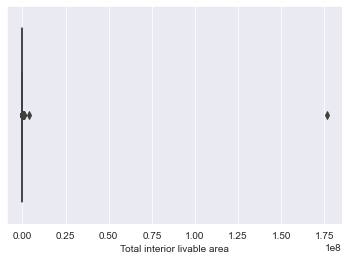

In [ ]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data_df['Total interior livable area'], orient='h')

Apply the concept introduced in the slides to calculate the following statistics of the **boxplot**

In [ ]:
Q1 = data_df['Total interior livable area'].quantile(0.25)
Q3 = data_df['Total interior livable area'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(1218.0, 2580.0, -825.0, 4623.0)

In [ ]:
data_df.shape

(164316, 32)

In [ ]:
# Based on the above calculation, we will remove samples that have "livable area" strictly above 5000 as outliers
data_df.drop(data_df[data_df['Total interior livable area'] > 5000].index, inplace=True)
data_df.shape

(161073, 32)

<AxesSubplot:xlabel='Total interior livable area', ylabel='Count'>

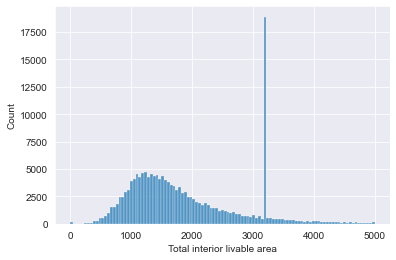

In [ ]:
# check the distribution of the "Total interior livable area" after removing outliers
sns.histplot(data_df['Total interior livable area'])

**Normalize** the "Total interior livable area"

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_df['Total interior livable area_normalized'] = scaler.fit_transform(data_df[['Total interior livable area']].values)

<AxesSubplot:xlabel='Total interior livable area_normalized', ylabel='Count'>

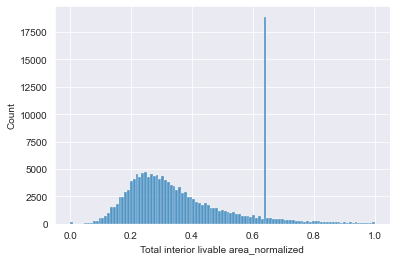

In [ ]:
# check the distribution of the "Total interior livable area" (after normalization)
sns.histplot(data_df['Total interior livable area_normalized'])

**Discussion:** compare the data distribution before VS after normalization, we can see that:
- normalization does not change the shape and distribution of the data
- the absolute values of the data are changed, but the relative values do not change
- after normalization, it's more intuitive to understand the relative value of all samples

**Additional analysis**: for attributes with large values (e.g., sold price), we typically apply **log scaling** to process.

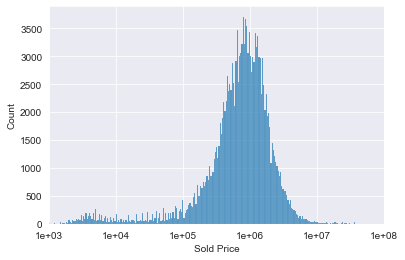

In [ ]:
# Check the histogram of the 'Sold Price' after apply log scaling.
ax = sns.histplot(np.log10(data_df['Sold Price']))
ax.set_xlim([3, 8])
ax.set_xticks(range(3, 9))
ax.set_xticklabels(['%.0e'%a for a in 10**ax.get_xticks()]);

# feel free to explore what will happen without log scaling

#### Task-2: follow the numerical data processing logic to process one of the following columns:
- Total spaces
- Garage spaces
- Lot size

*Notes:*
- You can decide the upper/lower threshold of removing outliers, it doesn't have to be the exact upper/lower threshold from the default settings of the boxplot.

In [13]:
# Drop the N/As
data_df['Total spaces'] = pd.to_numeric(data_df['Total spaces'], errors='coerce')
# data_df['Total spaces'].isna().sum()
data_df.drop(data_df[data_df['Total spaces'].isna()].index, inplace=True)

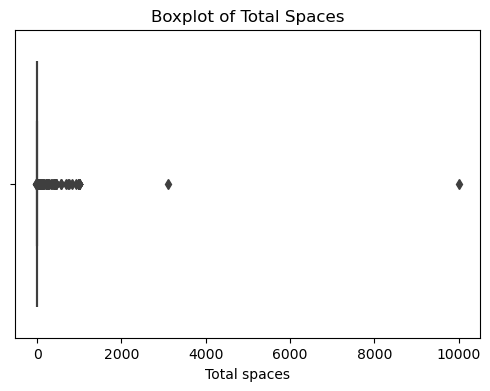

In [46]:
# Draw the boxplot
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.boxplot(x=data_df['Total spaces'])
plt.title("Boxplot of Total Spaces")
plt.xlabel("Total spaces")
plt.show()
# Q1 = data_df['Total spaces'].quantile(0.25)
# Q3 = data_df['Total spaces'].quantile(0.75)
# IQR = Q1 - Q3
# data_df = data_df[(data_df['Total spaces'] >= Q1 - 1.5*IQR) & (data_df['Sold Price'] <= Q3 + 1.5*IQR)]

From the boxplot, we can tell that there are some extreme values in the data that completely distorted the boxplot's shape and make it unreadable.

We will need to drop these outliners.
Especially the values that are extremely big.

In [15]:
# get a summary of how the data looks
data_df['Total spaces'].describe()

count    156630.000000
mean          1.429381
std           1.869335
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          50.000000
Name: Total spaces, dtype: float64

We can also see the minimum is -26, which is physically impossible.
The mean is only around 1, but the SD is around 29. This means that the data has extremes that is highly right-skewes.

In [ ]:
# Calculate the IQR
# Drop the outliners that are unreasonable(smaller than 0)
data_df = data_df[data_df["Total spaces"] >= 0]
Q1 = data_df['Total spaces'].quantile(0.25)
Q3 = data_df['Total spaces'].quantile(0.75)
IQR = Q3 - Q1
IQR

2.0

In [23]:
# drop the data that are strictly above 5
# data_df = data_df[(data_df['Total spaces'] >= Q1 - 1.5*IQR) & (data_df['Total spaces'] <= Q3 + 1.5*IQR)]
data_df.drop(data_df[data_df['Total spaces'] > 5].index, inplace=True)
data_df.shape

(152292, 32)

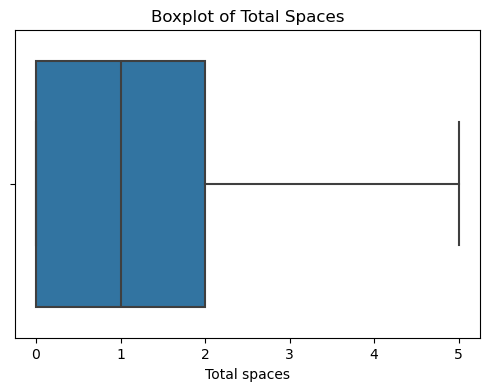

In [25]:
# Draw the new plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=data_df['Total spaces'])
plt.title("Boxplot of Total Spaces")
plt.xlabel("Total spaces")
plt.show()

After all these, I don't think the left part(like normalization and log scaling) is that necessary. The data are mainly distributed among 0, 1 and 2. And the distribution is pretty easy to understand. The data is ready for the next step of analysis.

<Axes: xlabel='Total spaces', ylabel='Count'>

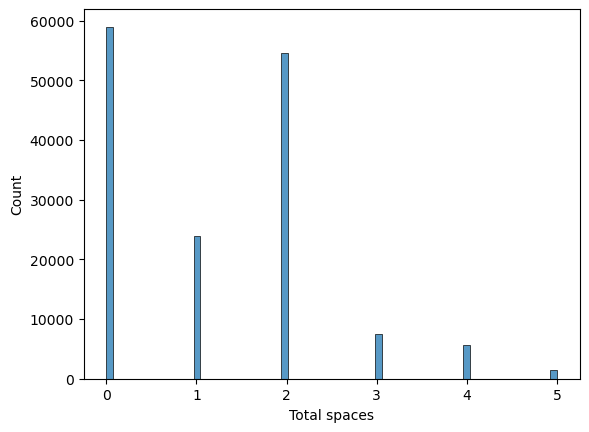

In [27]:
# Draw  histplot to show the distribution.
sns.histplot(data_df['Total spaces'])

### Categorical data processing
- encoding (one-hot/ordinal encoder)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# we will use the "Home type" column as an example to show the encoding logics
data_df['Home type'].value_counts()

SingleFamily          100457
Condo                  27462
Townhouse               7087
MultiFamily             6904
Unknown                 5573
MobileManufactured      3615
Apartment               1706
Cooperative              174
Name: Home type, dtype: int64

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(data_df[['Home type']])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
# the learned categories during model fit
ohe.categories_

[array(['Apartment', 'Condo', 'Cooperative', 'MobileManufactured',
        'MultiFamily', 'SingleFamily', 'Townhouse', 'Unknown', nan],
       dtype=object)]

In [ ]:
# encode the "Home type" with the learned categories during the fit process
ohe.transform(data_df[['Home type']]).toarray()[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
# convert the original "Home type" column to the encoded categories
pd.DataFrame(ohe.transform(data_df[['Home type']]).toarray()).rename(columns={i: catg for i, catg in enumerate(ohe.categories_[0])})

,Apartment,Condo,Cooperative,MobileManufactured,MultiFamily,SingleFamily,Townhouse,Unknown,NaN
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
161068,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161069,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161070,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161071,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Text data processing

In [28]:
import nltk

In [29]:
text_col = ['Address', 'Summary', 'Heating', 'Cooling', 'Parking', 'Heating features', 'Parking features']

In [30]:
data_df[text_col]

,Address,Summary,Heating,Cooling,Parking,Heating features,Parking features
0,"11205 Monterey,","11205 Monterey, San Martin, CA 95046 is a sing...",No Data,No Data,0 spaces,None,None
1,"5281 Castle Rd,",Spectacular Mountain and incredible L.A. City ...,Central,"Central Air, Dual","Driveway, Driveway - Brick",Central,"Driveway, Driveway - Brick"
2,"3581 Butcher Dr,",Eichler Style home! with Santa Clara High! in ...,Central Forced Air - Gas,Central AC,"Garage, Garage - Attached, Covered","Forced air, Gas","Garage, Garage - Attached, Covered"
5,"4707 La Villa Mari UNIT J,",AGENTS READ PRIVATE REMARKS BEFORE CALLING; S...,Central,None,Garage - Attached,Forced air,Garage - Attached
6,"7517 Deveron Ct,",This lovely rental is located in the prestigio...,"Forced air, Gas",Central,"Garage, Garage - Attached, Covered","Forced air, Gas","Garage, Garage - Attached, Covered"
...,...,...,...,...,...,...,...
164939,"88 Lakeshore Ct,",STUNNING LAKE VIEW AND BAY VIEW! Exquisite Res...,"Baseboard, Electric",None,"Carport, Covered, Guest","Baseboard, Electric","Carport, Covered, Guest"
164940,"3785 Wilshire Blvd PENTHOUSE 3,",Arguably the best unit at Solair. This top flo...,Central,Central,Covered,Other,Covered
164941,"312 Circuit Way,","312 Circuit Way, Mountain View, CA 94043 is a ...",Other,No Data,"Garage, Garage - Attached, Covered",Other,"Garage, Garage - Attached, Covered"
164942,"2 Cape Breton Ct,",Park Pacifica CHECK OUT THE VIDEO Entering Ca...,Central Forced Air - Gas,None,"Underground/Basement, Garage - Attached","Forced air, Gas","Underground/Basement, Garage - Attached"


#### Text analysis for the "Summary" column

**tokenization**: the process of breaking down text into the smallest unit in a sentence (e.g., tokens can be words, numbers, punctuation marks)

In [31]:
from nltk import sent_tokenize
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\33641\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\33641\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\33641\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
# the "Summary" column of the first sample
text = data_df.iloc[0]['Summary']
text

'11205 Monterey, San Martin, CA 95046 is a single family home that contains 2,000 sq ft. It contains 2 bedrooms and 2 bathrooms. This home last sold for $2,000,000 in January 2020. \n \nThe Zestimate for this house is $2,153,229.'

In [18]:
nltk.sent_tokenize(text)

['11205 Monterey, San Martin, CA 95046 is a single family home that contains 2,000 sq ft.',
 'It contains 2 bedrooms and 2 bathrooms.',
 'This home last sold for $2,000,000 in January 2020.',
 'The Zestimate for this house is $2,153,229.']

In [19]:
print(nltk.word_tokenize(text))

['11205', 'Monterey', ',', 'San', 'Martin', ',', 'CA', '95046', 'is', 'a', 'single', 'family', 'home', 'that', 'contains', '2,000', 'sq', 'ft', '.', 'It', 'contains', '2', 'bedrooms', 'and', '2', 'bathrooms', '.', 'This', 'home', 'last', 'sold', 'for', '$', '2,000,000', 'in', 'January', '2020', '.', 'The', 'Zestimate', 'for', 'this', 'house', 'is', '$', '2,153,229', '.']


#### Bag-of-Words vector representation for text data

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

Fill-in **missing values** with empty string

In [33]:
data_df['Summary'].fillna(value='', inplace=True)

Take the "Summary" column from top-100 samples to form a sample corpus, do tokenization and lemmatization

In [34]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [35]:
corpus = data_df.iloc[:100]['Summary']
corpus_lem = []
for text in corpus:
    word_list = nltk.word_tokenize(text)
    word_lem = [lemmatizer.lemmatize(tok) for tok in word_list]
    corpus_lem.append(' '.join(word_lem))

**Vectorize** the lemmatized corpus with multiple conditions set by the parameters. **Be careful about the parameter settings.**

In [36]:
vectorizer = CountVectorizer(min_df=5, max_df=0.8,ngram_range=(1,1),binary=False,stop_words='english')
X = vectorizer.fit_transform(corpus_lem)

In [37]:
# check the feature matrix of the vectorized corpus
X.shape

(100, 266)

In [38]:
# check the extracted features during the vectorization
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['000', '2018', '2019', '2020', '280', '300', '400', '500',
       'access', 'additional', 'air', 'amazing', 'angeles', 'apple',
       'appliance', 'area', 'attached', 'ave', 'away', 'backyard',
       'balcony', 'bar', 'bath', 'bathroom', 'bay', 'beach', 'beautiful',
       'beautifully', 'bedroom', 'best', 'big', 'block', 'boast', 'brand',
       'breakfast', 'bright', 'building', 'built', 'buyer', 'ca',
       'cabinet', 'car', 'carpet', 'ceiling', 'center', 'central',
       'charming', 'check', 'city', 'close', 'closet', 'club', 'come',
       'community', 'commute', 'condo', 'contains', 'conveniently',
       'counter', 'countertop', 'cozy', 'credit', 'cul', 'custom', 'deck',
       'den', 'dining', 'distance', 'district', 'door', 'double',
       'downstairs', 'downtown', 'dr', 'drive', 'driveway', 'dryer',
       'dual', 'easy', 'elementary', 'end', 'enjoy', 'entertaining',
       'excellent', 'exterior', 'extra', 'family', 'fan', 'feature',
       'feel', 'fireplace', '

Find out the **top-10 most frequent features**

In [ ]:
def get_topn_features(X, feature_names, topn=10):
    """
    Inputs:
        X: feature matrix
        feature_names: extracted features during vectorization
        topn: the number of most frequent features to return
    Outputs:
        topn most frequent features and their frequency
    """
    feature_ct = np.asarray(np.sum(X, axis=0)).reshape(-1)

    feature_freq = []

    for i in np.argsort(feature_ct)[::-1][:topn]:
        feature_freq.append({'feature':feature_names[i], 'frequency':feature_ct[i]})

    return pd.DataFrame(feature_freq)

In [ ]:
get_topn_features(X, feature_names, topn=10)

,feature,frequency
0,new,102
1,room,97
2,bedroom,86
3,kitchen,67
4,living,56
5,bathroom,53
6,family,52
7,floor,48
8,large,46
9,ha,44


The top-10 most frequent words show that most house "Summary" describe the house conditions from the aspect of new, bedroom, bathroom, living, kitchen, floor. **However**, it is unclear why "ha" appears to be a frequent word. We need to find out documents that contain "ha" and explore the specific reason.

In [ ]:
# find the index of "ha" from the feature list
np.where(feature_names == 'ha')

(array([109]),)

In [ ]:
# find "ha" from the lemmatized corpus
np.array(corpus_lem)[np.where(X[:, 109].toarray() > 0)[0]][:2] # only select two samples for visualization purpose

array(['This lovely rental is located in the prestigious Villages Golf & Country Club , a 55+ community in the Evergreen area of Silicon Valley . Rent for 6 or 12 month .... perfect if you want to try out living in The Villages before buying , This home ha new carpet , 2 bedroom , 2 bath , kitchen with breakfast nook , granite counter , 2 pantry , 2 car garage with storage and a huge back patio for relaxing . The Villages offer many amenity like . . . 18 & 9 hole Golf course , 4 Swimming Pools & Spas , Tennis , Pickle-ball , Bocce , Billiards plus many Organized activity . Two restaurant with Clubhouse for fine dining and the Bistro for casual and patio dining ,',
       'Located in the heart of Silicon Valley is this wonderfully maintained 1973 Lancer home . It come with 2 bedroom and 2 bathroom . This home offer carpet throughout the room and living room . This well-kept home ha all the need any home buyer would love including a kitchen with a pantry , microwave , gas stove/oven , an

In [ ]:
# find "ha" from the raw corpus before tokenization and lemmatization
corpus.values[np.where(X[:, 109].toarray() > 0)[0]][:2] # only select two samples for visualization purpose

array(['This lovely rental is located in the prestigious Villages Golf & Country Club, a 55+ community in the Evergreen area of Silicon Valley. Rent for 6 or 12 months....perfect if you want to try out living in The Villages before buying, This home has new carpet, 2 bedrooms, 2 bath, kitchen with breakfast nook, granite counters, 2 pantries, 2 car garage with storage and a huge back patio for relaxing. The Villages offers many amenities like. . . 18 & 9 hole Golf courses, 4 Swimming Pools & Spas, Tennis, Pickle-ball, Bocce, Billiards plus many Organized activities. Two restaurants with Clubhouse for fine dining and the Bistro for casual and patio dining,',
       'Located in the heart of Silicon Valley is this wonderfully maintained 1973 Lancer home. It comes with 2 bedrooms and 2 bathrooms. This home offers carpet throughout the rooms and living room. This well-kept home has all the needs any home buyer would love including a kitchen with a pantry, microwave, gas stove/oven, and refr

In [ ]:
# according to the above observation, it seems like "ha" is the lemma of "has"
lemmatizer.lemmatize('has')

'ha'

**Discussion**:
- Based on the above exploration, we know that "ha" appears to be a frequent word, because it is lemmatized from "has", which is frequently used in the "Summary" description. <br>
- According to our common sense, "ha" doesn't provide deeper understanding of the house's "Summary" information. So we can process it as a stop-word and remove it during the vectorization process.

In [ ]:
# add self-defined stop-words
from sklearn.feature_extraction import text
new_stop_words = text.ENGLISH_STOP_WORDS.union(['ha'])
# start from vectorization to repeat the above process
# In real-world tasks, you might need to repeat the above process multiple times to remove unreasonable features

#### Task-3: process the "Summary" column for all samples
- In the above process, we showed the logics for doing text processing on 100 samples.
- In the next part, please follow the logic to process the "Summary" column for all samples.
- Find out the top-20 most frequent words (you might repeat the process multiple times until the top-20 most frequent words make sense to you).

In [39]:
# full sample
full_sp = data_df['Summary']
full_sp

0         11205 Monterey, San Martin, CA 95046 is a sing...
1         Spectacular Mountain and incredible L.A. City ...
2         Eichler Style home! with Santa Clara High! in ...
5         AGENTS READ PRIVATE REMARKS BEFORE CALLING;  S...
6         This lovely rental is located in the prestigio...
                                ...                        
164939    STUNNING LAKE VIEW AND BAY VIEW! Exquisite Res...
164940    Arguably the best unit at Solair. This top flo...
164941    312 Circuit Way, Mountain View, CA 94043 is a ...
164942    Park Pacifica CHECK OUT THE VIDEO  Entering Ca...
164943    25 Calabasas Rd, Freedom, CA 95019 is a single...
Name: Summary, Length: 152292, dtype: object

In [40]:
# Vectorization
summary_lem = []
for text in full_sp:
    word_list = nltk.word_tokenize(text)
    word_lem = [lemmatizer.lemmatize(tok) for tok in word_list]
    summary_lem.append(' '.join(word_lem))

The next step is to initiate the parameters. min_df is around 2% of the whole sample size and I keep all other parameters.

In [41]:
vectorizer = CountVectorizer(min_df=800, max_df=0.8,ngram_range=(1,1),binary=False,stop_words='english')
X = vectorizer.fit_transform(summary_lem)

In [42]:
X.shape

(152292, 1360)

In [43]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['00', '000', '10', ..., 'zone', 'zoned', 'zoning'], dtype=object)

In [44]:
# find the top 20 words based on the original settings
import numpy as np
def get_topn_features(X, feature_names, topn=20):
    """
    Inputs:
        X: feature matrix
        feature_names: extracted features during vectorization
        topn: the number of most frequent features to return
    Outputs:
        topn most frequent features and their frequency
    """
    feature_ct = np.asarray(np.sum(X, axis=0)).reshape(-1)

    feature_freq = []

    for i in np.argsort(feature_ct)[::-1][:topn]:
        feature_freq.append({'feature':feature_names[i], 'frequency':feature_ct[i]})

    return pd.DataFrame(feature_freq)

In [35]:
get_topn_features(X, feature_names, topn=20)

,feature,frequency
0,home,285100
1,bedroom,154418
2,room,150918
3,kitchen,102644
4,bathroom,94250
5,new,92979
6,floor,86793
7,living,86393
8,ha,81652
9,large,80452


Just like the provided sample, 'ha' is included in the results and we will get rid of it. And the 'Zestimate' is Zillow's automated home valuation tool.
From my view, I think we can take Zestimate out of the wordlist, since it is in a completely different category. We can take this word as an independent conclusion.
Also words like contains and built are related to the context, but these words are just frequently used in this field. They cannot help find new conclusions about the feature of the studied text.

In [44]:
# update the stopword list based on the initial result
from sklearn.feature_extraction import text
new_stop_words = list(text.ENGLISH_STOP_WORDS.union(['ha', 'zestimate', 'contains', 'built']))

In [ ]:
# Then we are going to repeat the process
vectorizer = CountVectorizer(min_df=800, max_df=0.8,ngram_range=(1,1),binary=False,stop_words=new_stop_words)
X = vectorizer.fit_transform(summary_lem)

In [47]:
feature_names = vectorizer.get_feature_names_out()
def get_topn_features(X, feature_names, topn=20):
    """
    Inputs:
        X: feature matrix
        feature_names: extracted features during vectorization
        topn: the number of most frequent features to return
    Outputs:
        topn most frequent features and their frequency
    """
    feature_ct = np.asarray(np.sum(X, axis=0)).reshape(-1)

    feature_freq = []

    for i in np.argsort(feature_ct)[::-1][:topn]:
        feature_freq.append({'feature':feature_names[i], 'frequency':feature_ct[i]})

    return pd.DataFrame(feature_freq)
get_topn_features(X, feature_names, topn=20)

,feature,frequency
0,home,285100
1,bedroom,154418
2,room,150918
3,kitchen,102644
4,bathroom,94250
5,new,92979
6,floor,86793
7,living,86393
8,large,80452
9,family,72872


So the master here is confusing, and we will check where master appears in the text to decide whether or not it should be included.

In [50]:
np.where(feature_names == 'master')

(array([805], dtype=int64),)

In [51]:
np.array(summary_lem)[np.where(X[:, 805].toarray() > 0)[0]][:2]

MemoryError: Unable to allocate 960. MiB for an array with shape (41354,) and data type <U6087

Unlike the provided sample, which only have the vary small part of the whole sample set. This sample size is too big and makes it a lot harder to process.
Thus I decided to use another method. Actually we don't need the whole sentence to know what this word means in the context and if it is needed. We only need to get the phrase the word is in.
So I am going to find the word before 'master' and the word after it to get a 3-word phrase. I will search the first 5 'master' I find.

In [52]:
word = 'master'
j = vectorizer.vocabulary_[word]

rows = X[:, j].nonzero()[0]

triples = []

for i in rows:
    tokens = summary_lem[i].split()
    for k in range(1, len(tokens) - 1):
        if tokens[k] == word:
            triples.append((tokens[k-1], tokens[k], tokens[k+1]))
            break
    if len(triples) == 5:
        break

triples

[('The', 'master', 'bedroom'),
 ('The', 'master', 'suite'),
 ('Spacious', 'master', 'bedroom'),
 ('luxurious', 'master', 'bedroom'),
 ('a', 'master', 'suite')]

So the master here means the 'main' bedroom or suite in the context. I will keep the word in the list.

We can tell from the wordlist:
Home is the top 1 word in the list. This perhaps infers that summaries are trying to emphasize this feeling of returning home. Perhaps it's because this makes people feel secured and cozy.
The summaries focused on the room introduction, especially bedroom, bathroom, kitchen. These 3 rooms are closely related to daily lives.
Words like large, area, space infer that size matters in these summaries.
Also words like view also shows that a good view at the window is a big advantage in the market.

### Additional exploration

#### Date-time representation
- In this part, we will process the columns that are formated as DataTime by generating a corresponding feature list such as: [year, month, day]

In [ ]:
data_col = ['Sold On', 'Year built', 'Listed On']

In [ ]:
# we will use the "Sold On" column as an example to show the processing logics
data_df.iloc[:10]['Sold On']

0     01/31/20
1     02/25/21
2     11/06/19
4     10/19/20
5     02/24/21
6     08/31/19
7     11/06/19
8     01/30/21
9     08/31/18
10    01/13/21
Name: Sold On, dtype: object

In [ ]:
# convert the column to DataTime type
data_df['Sold On'] = pd.to_datetime(data_df['Sold On'], infer_datetime_format=True)

In [ ]:
# extract year/month/day or other corresponding features
data_df['Sold_Year'] = data_df['Sold On'].apply(lambda time: time.year)
data_df['Sold_Month'] = data_df['Sold On'].apply(lambda time: time.month)
data_df['Sold_Day'] = data_df['Sold On'].apply(lambda time: time.day)

In [ ]:
data_df[['Sold On', 'Sold_Year', 'Sold_Month', 'Sold_Day']]

,Sold On,Sold_Year,Sold_Month,Sold_Day
0,2020-01-31,2020,1,31
1,2021-02-25,2021,2,25
2,2019-11-06,2019,11,6
4,2020-10-19,2020,10,19
5,2021-02-24,2021,2,24
...,...,...,...,...
164939,2021-02-19,2021,2,19
164940,2018-05-31,2018,5,31
164941,2019-11-04,2019,11,4
164942,2020-07-23,2020,7,23


#### Create new features and check colinearty

In [ ]:
# Houses could have different types, here are the top types:
data_df['Type'].value_counts()[0:10]

SingleFamily          99837
Condo                 27354
Townhouse              7093
MultiFamily            6865
VacantLand             6199
Unknown                5567
MobileManufactured     3595
Apartment              1705
Single Family           458
Cooperative             174
Name: Type, dtype: int64

We want to **calculate an additional feature "price per living sqft" from the current features**, an important measurement of final house price. Let's check the differences between different house types.

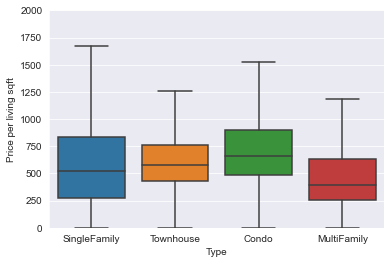

In [ ]:
common_types = data_df['Type'].isin(['SingleFamily', 'Condo', 'MultiFamily', 'Townhouse'])
data_df['Price per living sqft'] = data_df['Sold Price'] / data_df['Total interior livable area']
ax = sns.boxplot(x='Type', y='Price per living sqft', data=data_df[common_types], fliersize=0)
ax.set_ylim([0, 2000]);

Sale price per living sqft is often related with house locations. Let's check the price for the top 20 zip codes.

In [ ]:
data_df['Zip'].value_counts()[:20]

95003    794
94089    789
95131    789
95060    789
95122    788
95118    787
95133    787
94404    787
95136    786
95148    785
95135    785
94043    784
94087    784
95123    784
95062    784
95124    783
95111    783
95066    782
95076    782
95132    782
Name: Zip, dtype: int64

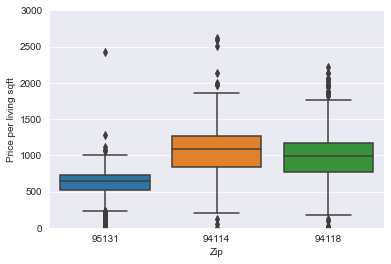

In [ ]:
data_df['Zip'] = data_df['Zip'].astype('string')
data_df['Price per living sqft'] = data_df['Sold Price'] / data_df['Total interior livable area']
mask = data_df['Zip'].isin(['95131','94114', '94118'])
ax = sns.boxplot(x='Zip', y='Price per living sqft', data=data_df[mask])
ax.set_ylim([0, 3000]);

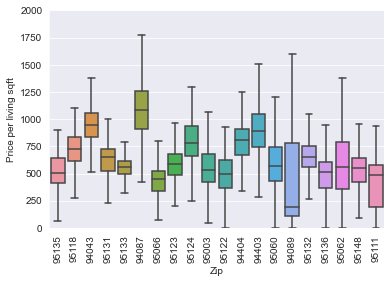

In [ ]:
d = data_df[data_df['Zip'].isin(data_df['Zip'].value_counts()[:20].keys())]
ax = sns.boxplot(x='Zip', y='Price per living sqft', data=d, fliersize=0)
ax.set_ylim([0, 2000])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In some cases, we also need to check the correlations among multiple columns:
- as a way to measure **colinearty**
- visualize the correlation matrix as a **heatmap**

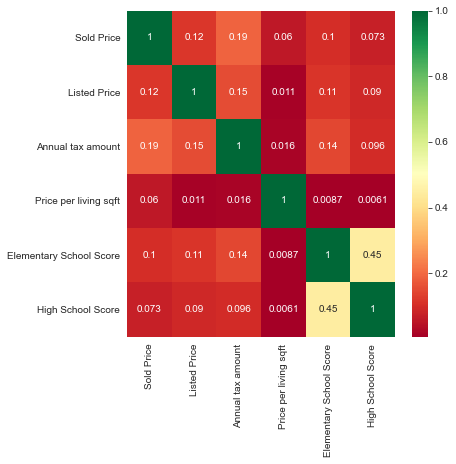

In [ ]:
_, ax = plt.subplots(figsize=(6,6))
columns = ['Sold Price', 'Listed Price', 'Annual tax amount', 'Price per living sqft', 'Elementary School Score', 'High School Score']
sns.heatmap(data_df[columns].corr(),annot=True,cmap='RdYlGn', ax=ax);

According to the heat map, we can observe that:
- sold price is not closely correlated with the listed price
- sold price has some correlation with the annual tax amount

**Task-4 (Optional)**: what other conclusions do you have? Could you explain these correlations from social science perspective?


In [ ]:
# start your code here


### Summary

In this notebook, we practiced fundamental processing techniques for various types of data, including:

  - Data overview (understanding data types, values, and distributions)
  - Data cleaning (remove missing values, detect and handle outliers)
  - Categorical data processing (one-hot encoding, ordinal encoding)
  - Numerical data processing (normalization, standardization)
  - Text data processing (CountVectorizer)
  - Understanding the interactions between columns (colinearty examination)

This is just a starting point -- feel free to further explore the dataset and uncover deeper insights.